# 시계열 데이터 분석
- 자기회귀모델, 이동평균모델, ARIMA모델, 분해시계열
- 시간에 따라 관측된 데이터, 즉 독립변수가 시간
  - 시계열데이터는 추세, 계절, 순환, 불규칙 요인을 가질 수 있음
- 많은 통계 모형은 시계열 데이터가 정상성을 가진 데이터라고 가정하고 논리를 전개
  - 평균, 분산이 시간의 흐름과 관계없이 안정화
  - 공분산이 시간의 흐름과 관계없이 안정화, 시차에만 의존
- 비정상 시계열 데이터를 차분등의 방법으로 정상 시계열로 변환한 다음에 분석 적용
- 분해시계열은 데이터를 추세, 계절, 순환, 불규칙 요인으로 분해해서 분석하는 것을 의미

## 시계열 모델
- 자기회귀 모델, 이동평균 모델, ARIMA 모델

### 자기 회귀 모델(AR model)
- 현재 시점의 시계열 데이터는 과거의 어느 시점의 시계열 데이터로 예측하는 방법
  - 1차 AR 모델, AR(1) => 현재값과 한 시점 과거의 값을 이용해서 미래의 한 시점을 예측
- ACF(자기상관함수), PACF(부분자기상관함수)를 이용해서 AR(p)의 p를 결정  

### 이동 평균 모델(MA model)
- 현재 시점의 시계열 데이터는 과거 데이터의 평균으로 예측하는 방법
  - 1차 MA 모델, MA(1) => 현재값과 한 시점 과거의 값의 평균을 이용해서 미래의 한 시점을 예측
- ACF, PACF를 이용해서 MA(p)의 p를 결정

### ARIMA 모델
- AR 모델 + MA 모델을 통합한 모델
- ARIMA(p, d, q)로 변수 3개로 구성
  - p는 AR 모델과 관련, q는 MA 모델과 관련
  - d는 비정상 시계열을 정상화 하기 위해 몇 번의 차분을 하는지 의미(정상 시계열이면 d = 0, 차분 안함을 의미)
    - 즉, d = 0이면 => ARMA(p, q) 모델이라고 함 
- p = 0이면 IMA(d, q) 모델이라 부르고, d번 차분하면 MA(q) 모델이 됨
- q = 0이면 ARI(p, q) 모델이라 부르고, d번 차분하면 AR(p) 모델이 됨
- auto.arima 함수 이용하여 p, d, q 찾음


Series: Nile 
ARIMA(1,1,1) 

Coefficients:
         ar1      ma1
      0.2544  -0.8741
s.e.  0.1194   0.0605

sigma^2 estimated as 20177:  log likelihood=-630.63
AIC=1267.25   AICc=1267.51   BIC=1275.04


Call:
arima(x = Nile, order = c(1, 1, 1))

Coefficients:
         ar1      ma1
      0.2544  -0.8741
s.e.  0.1194   0.0605

sigma^2 estimated as 19769:  log likelihood = -630.63,  aic = 1267.25

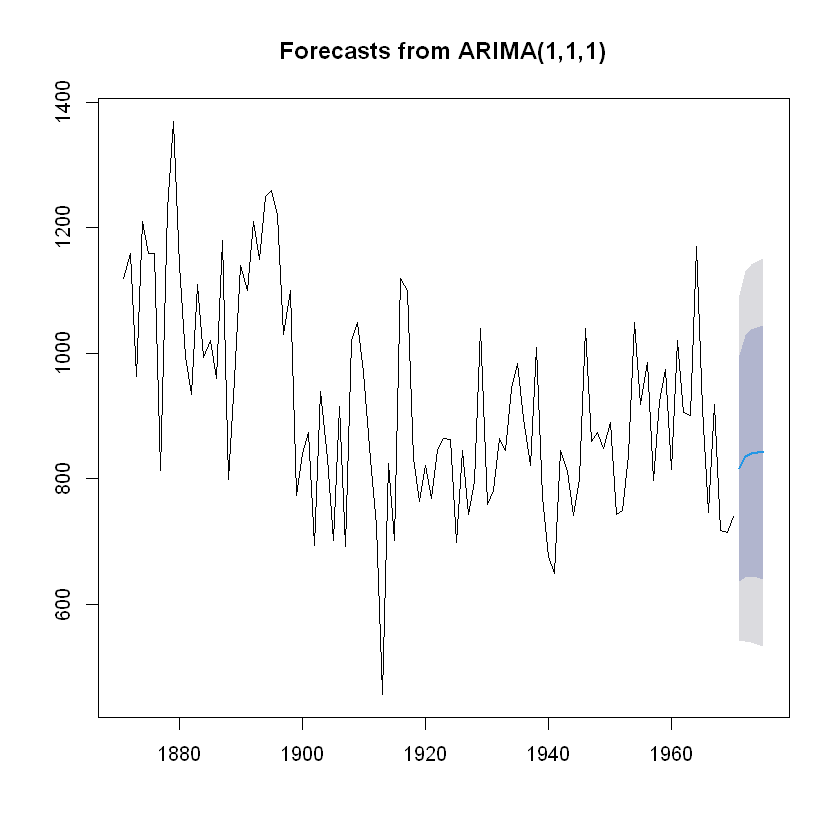

In [13]:
library(forecast) # auto.arima 함수 이용 목적

# 수행결과, p, d, q를 각 1로 추정
auto.arima(Nile)

# 추정한 p, d, q 값으로 arima 모델 생성
Nile.arima <- arima(Nile, order = c(1,1,1))
Nile.arima

# 생성한 모델로 미래 5년 예측
plot(forecast(Nile.arima, h = 5))

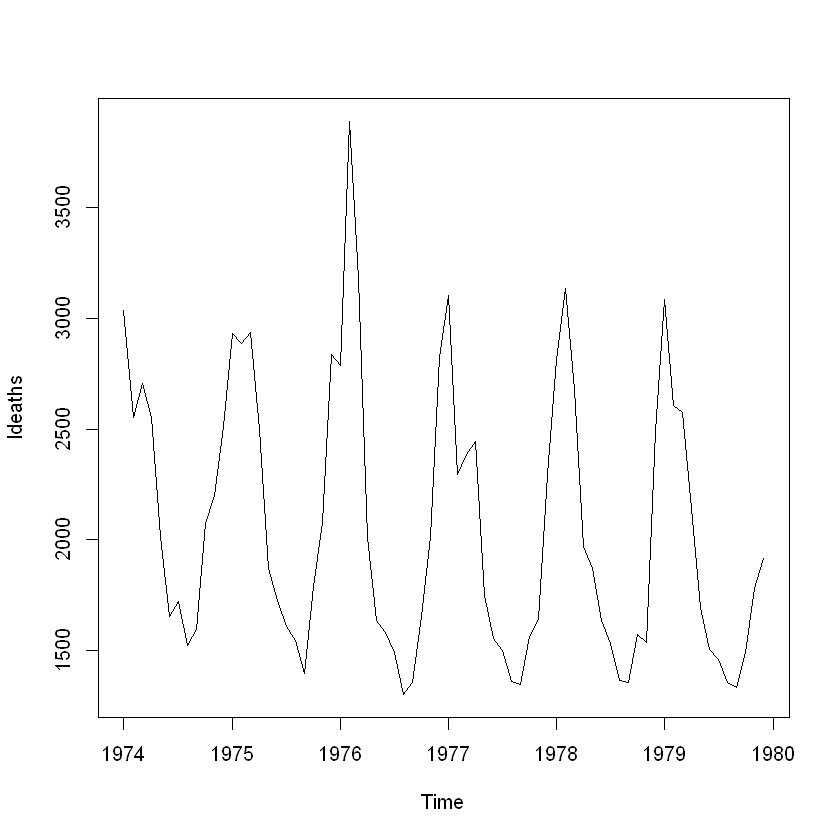

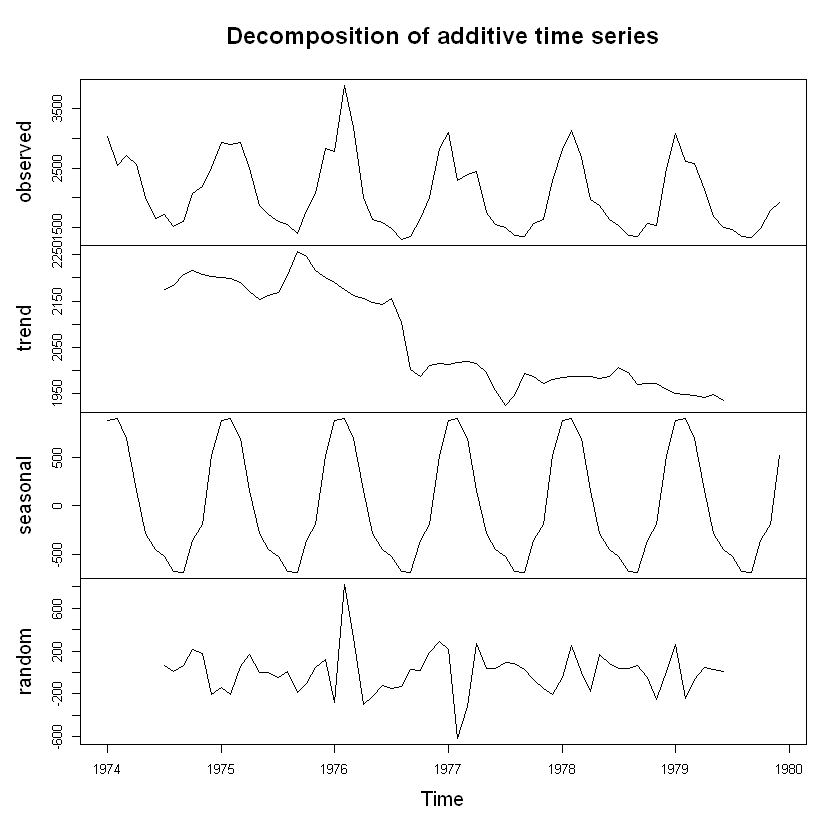

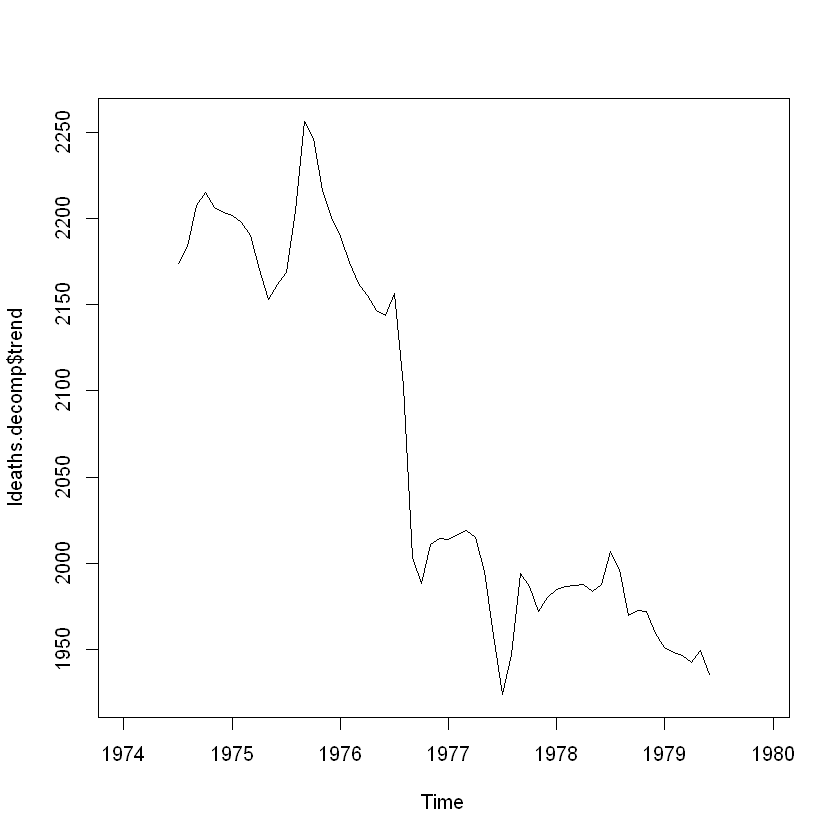

In [18]:
# 분해 시계열

plot(ldeaths)

ldeaths.decomp <- decompose(ldeaths)
plot(ldeaths.decomp)

# 추세 요인만 따로 떼서 보기
plot(ldeaths.decomp$trend)